In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import RELACS as rel
import matplotlib
#import matplotlib.cm as cm
from matplotlib import colors
import matplotlib.colors as mcolors
sns.set_style("white")
sns.set_context("paper")
%load_ext rpy2.ipython
%matplotlib inline

/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/package/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [94]:
### DEFINE UP- AND DOWN-REGULATED GENES ###

deg_npc = pd.read_csv("../../figure_3/INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_NPC48h_EPZvsDMSO.tsv", sep="\t")
deg_npc_up = deg_npc.loc[(deg_npc.padj<0.05) & (deg_npc.log2FoldChange>0)]
deg_npc_down = deg_npc.loc[(deg_npc.padj<0.05) & (deg_npc.log2FoldChange<0)]

deg_esc = pd.read_csv("../../figure_3/INTERMEDIATE_FILES/DE_genes_shrinked_apeglm_mESC_EPZvsDMSO.tsv", sep="\t")
deg_esc_up = deg_esc.loc[(deg_esc.padj<0.05) & (deg_esc.log2FoldChange>0)]
deg_esc_down = deg_esc.loc[(deg_esc.padj<0.05) & (deg_esc.log2FoldChange<0)]
deg_npc_up

,baseMean,log2FoldChange,lfcSE,pvalue,padj,symbol
ENSMUSG00000036760.7,1770.636991,1.120540,0.104470,3.409692e-28,2.588638e-24,Kcnk9
ENSMUSG00000024087.3,2561.622542,0.851518,0.112525,1.510696e-15,2.548711e-12,Cyp1b1
ENSMUSG00000021943.7,388.340886,0.933019,0.163467,5.281767e-10,4.859388e-07,Gdf10
ENSMUSG00000062296.8,2357.952053,0.588740,0.108915,3.043059e-09,1.952229e-06,Trank1
ENSMUSG00000027894.14,1847.104091,0.474368,0.101447,1.413892e-07,5.963484e-05,Slc6a17
...,...,...,...,...,...,...
ENSMUSG00000024517.16,288.976437,0.476087,0.219421,8.854449e-04,4.758194e-02,Rax
ENSMUSG00000113362.1,203.831863,0.531165,0.248259,9.180206e-04,4.890956e-02,RP24-159L15.2
ENSMUSG00000019235.9,1781.611865,0.254856,0.110808,9.319455e-04,4.913424e-02,Rps6kl1
ENSMUSG00000028073.15,286.548233,0.468678,0.218349,9.376399e-04,4.926341e-02,Pear1


In [78]:
### DEFINE PROMOTER TO SELECT ###

prom_npc = pd.read_csv("../../figure_3/INTERMEDIATE_FILES/Promoter_Model_ChromSeg_NPC48h.bed", sep="\t", header=None,
                      names = ["chr","start","end","geneID","sc","strand","symbol","length"])
prom_npc.index = prom_npc.geneID

prom_npc_up = prom_npc.loc[deg_npc_up.index].dropna()
prom_npc_up["start"] = prom_npc_up["start"].astype('int')
prom_npc_up["end"] = prom_npc_up["end"].astype('int')
prom_npc_up.to_csv("../INTERMEDIATE_FILES/Promoter_NPC_up.bed",sep="\t",index=False,header=False)

prom_npc_down = prom_npc.loc[deg_npc_down.index].dropna()
prom_npc_down["start"] = prom_npc_down["start"].astype('int')
prom_npc_down["end"] = prom_npc_down["end"].astype('int')
prom_npc_down.to_csv("../INTERMEDIATE_FILES/Promoter_NPC_down.bed",sep="\t",index=False,header=False)

prom_npc.sample(200, replace=False).to_csv("../INTERMEDIATE_FILES/Promoter_NPC_Background.bed",sep="\t",index=False,header=False)


prom_esc = pd.read_csv("../../figure_3/INTERMEDIATE_FILES/Promoter_Model_ChromSeg_mESC.bed", sep="\t", header=None,
                      names = ["chr","start","end","geneID","sc","strand","symbol","length"])
prom_esc.index = prom_esc.geneID

prom_esc_up = prom_esc.loc[deg_esc_up.index].dropna()
prom_esc_up["start"] = prom_esc_up["start"].astype('int')
prom_esc_up["end"] = prom_esc_up["end"].astype('int')
prom_esc_up.to_csv("../INTERMEDIATE_FILES/Promoter_ESC_up.bed",sep="\t",index=False,header=False)

prom_esc_down = prom_esc.loc[deg_esc_down.index].dropna()
prom_esc_down["start"] = prom_esc_down["start"].astype('int')
prom_esc_down["end"] = prom_esc_down["end"].astype('int')
prom_esc_down.to_csv("../INTERMEDIATE_FILES/Promoter_ESC_down.bed",sep="\t",index=False,header=False)


/package/anaconda3/bin/ipython:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
/package/anaconda3/bin/ipython:12: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
/package/anaconda3/bin/ipython:24: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
/package/anaconda3/bin/ipython:29: FutureWarning: 
Passing 

In [79]:
%%bash

bedtools intersect -a ../INPUT_DATA/NPC48hs_MACS2_BAMPE_consensusSet.bed -b ../INTERMEDIATE_FILES/Promoter_NPC_up.bed -u > ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC.bed
bedtools intersect -a ../INPUT_DATA/NPC48hs_MACS2_BAMPE_consensusSet.bed -b ../INTERMEDIATE_FILES/Promoter_NPC_down.bed -u > ../INTERMEDIATE_FILES/ATAC_onSigDown_NPC.bed
bedtools intersect -a ../INPUT_DATA/NPC48hs_MACS2_BAMPE_consensusSet.bed -b ../INTERMEDIATE_FILES/Promoter_NPC_Background.bed -u > ../INTERMEDIATE_FILES/ATAC_onBackground_NPC.bed

awk -v OFS="\t" '{printf "%s:%d-%d\tup\n",$1,($2+(($3-$2)/2))-500,($2+(($3-$2)/2))+500}' ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC.bed > ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC_1kbExt.txt
awk -v OFS="\t" '{printf "%s:%d-%d\tdown\n",$1,($2+(($3-$2)/2))-500,($2+(($3-$2)/2))+500}' ../INTERMEDIATE_FILES/ATAC_onSigDown_NPC.bed > ../INTERMEDIATE_FILES/ATAC_onSigDown_NPC_1kbExt.txt
awk -v OFS="\t" '{printf "%s:%d-%d\tback\n",$1,($2+(($3-$2)/2))-500,($2+(($3-$2)/2))+500}' ../INTERMEDIATE_FILES/ATAC_onBackground_NPC.bed > ../INTERMEDIATE_FILES/ATAC_onBackground_NPC_1kbExt.txt

cat ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC_1kbExt.txt ../INTERMEDIATE_FILES/ATAC_onSigDown_NPC_1kbExt.txt ../INTERMEDIATE_FILES/ATAC_onBackground_NPC_1kbExt.txt | sort | uniq > ../INTERMEDIATE_FILES/input_mealstrom.txt
cat ../INTERMEDIATE_FILES/input_mealstrom.txt | uniq -w 15 -u > ../INTERMEDIATE_FILES/input_mealstrom_def.txt
awk 'BEGIN{print "loc","cluster"}{print $0}' ../INTERMEDIATE_FILES/input_mealstrom_def.txt > ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt



In [80]:
%%bash

source activate gimme

# gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_1
# gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_2
# gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_3
# gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_4
# gimme maelstrom ../INTERMEDIATE_FILES/input_mealstrom_def_def.txt /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa ../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_5




/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(

,up,down,back
GM.5.0.Sox.0001,-4.338385,0.064532,-2.967904
GM.5.0.Ets.0004,0.000000,0.000000,2.604402
GM.5.0.C2H2_ZF.0009,0.000000,0.000000,3.623042
GM.5.0.bHLH.0014,3.072010,0.000000,0.000000
GM.5.0.C2H2_ZF.0015,0.000000,-0.013879,4.278976
GM.5.0.Mixed.0010,0.000000,0.000000,3.347601
GM.5.0.Ets.0007,0.000000,0.000000,2.162634
GM.5.0.bHLH.0028,4.010001,0.000000,0.000000
GM.5.0.Nuclear_receptor.0020,2.604852,0.000000,0.000000
GM.5.0.Homeodomain_Paired_box.0003,0.000000,2.619267,0.000000


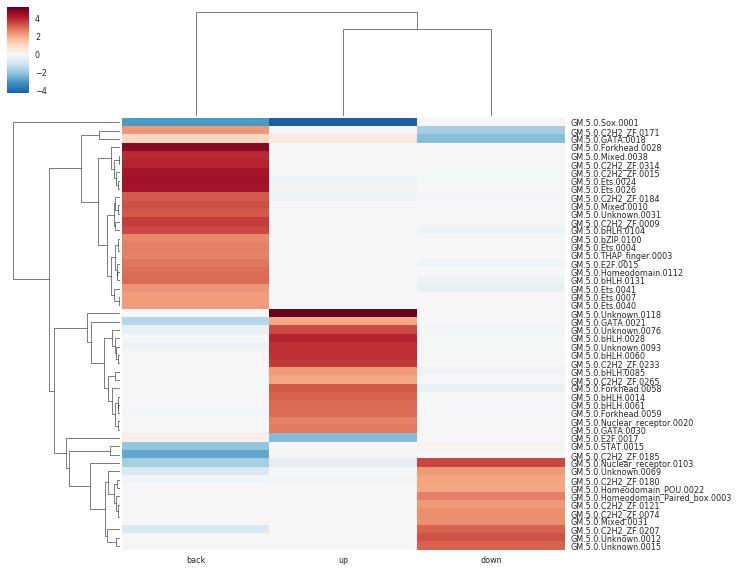

In [96]:
res_1 = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_1/final.out.csv", index_col=0)
res_2= pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_2/final.out.csv", index_col=0)
res_3 = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_3/final.out.csv", index_col=0)
res_4 = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_4/final.out.csv", index_col=0)
res_5 = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_5/final.out.csv", index_col=0)
res_back = np.mean(np.array([res_1["back"].values,res_2["back"].values,res_3["back"].values,res_4["back"].values,res_5["back"].values]),axis=0)
res_up = np.mean(np.array([res_1["up"].values,res_2["up"].values,res_3["up"].values,res_4["up"].values,res_5["up"].values]),axis=0)
res_down = np.mean(np.array([res_1["down"].values,res_2["down"].values,res_3["down"].values,res_4["down"].values,res_5["down"].values]),axis=0)


res_ = pd.DataFrame({"back":res_back,"up":res_up,"down":res_down}, index=res_1.index)
res_[np.any(abs(res_) >= 2, 1)]
sns.clustermap(res_[["up","down","back"]][np.any(abs(res_[["up","down","back"]]) >= 2, 1)],cmap="RdBu_r",center=0)
res_[["up","down","back"]][np.any(abs(res_[["up","down","back"]]) >= 2, 1)]

/package/anaconda3/bin/ipython:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


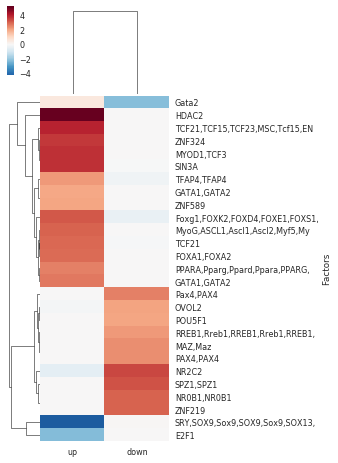

In [97]:
m2f = pd.read_table("../INTERMEDIATE_FILES/Maelstrom_ATAC_DEG_1/gimme.vertebrate.v5.0.motif2factors.txt", index_col=0)
m2f_ = [",".join(m2f.groupby("Motif").get_group(j)['Factor'].values) for j in m2f.index.unique()]
m2f = pd.Series(m2f_, name="Factors", index = m2f.index.unique()).to_frame()
m2f.Factors = m2f.Factors.str.slice(0,30)

df = res_.merge(m2f, right_index=True, left_index=True).set_index("Factors")
df[["up","down"]][np.any(abs(df[["up","down"]]) >= 2, 1)]
cm = sns.clustermap(df[["up","down"]][np.any(abs(df[["up","down"]]) >= 2, 1)],cmap="RdBu_r",center=0, figsize=(6,8))
cm.fig.subplots_adjust(right=0.5)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()

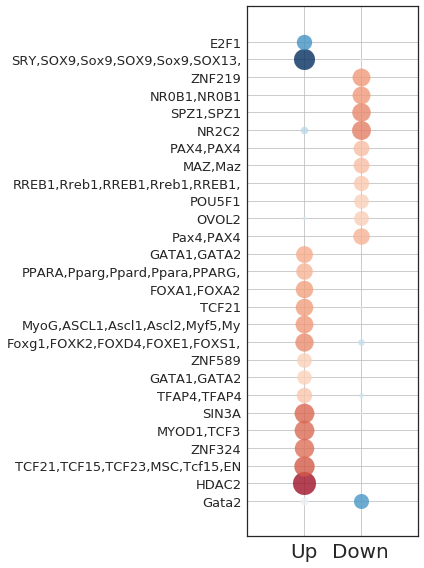

In [99]:
data = df[["up","down"]][np.any(abs(df[["up","down"]]) >= 2, 1)]

plt.figure(figsize=(6,8))
plt.grid(color="silver")
plt.xticks(range(2),["Up","Down"],size=20)
plt.yticks(range(data.shape[0]),cm.data2d.index, size=13)
plt.xlim(-1,2)
plt.ylim(-2,data.shape[0]+1)
norm = mcolors.Normalize(vmin=cm.data2d.min().min(), vmax=6, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.RdBu_r)
col_map = pd.DataFrame()
col_map['up'] = cm.data2d['up'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map['down'] = cm.data2d['down'].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)))
col_map
for i in range(cm.data2d.shape[1]):
    for j in range(cm.data2d.shape[0]):
        #print([i,j], cm.data2d.values[j,i])
        #print(np.fabs(cm.data2d.values[j,i]))
        plt.scatter([i], [j], s=np.fabs(cm.data2d.values[j,i])*100, color = col_map.values[j,i], zorder=3,alpha=0.8)
plt.tight_layout()      
plt.savefig("../FIGURES/Motif_activity_on_Promoters_NPC48h.pdf")

In [86]:
%%bash

source activate gimme

gimme motifs -n ../INTERMEDIATE_FILES/MotifEnrich_Promoters_UpGenes_NPC48h \
-g /data/repository/organisms/GRCm38_ensembl/genome_fasta/genome.fa -N 20 -f 0.4 ../INTERMEDIATE_FILES/ATAC_onSigUP_NPC.bed

/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/ferrari/anaconda3/envs/gimme/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(